In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from moviepy.editor import VideoFileClip
from tensorflow import keras


In [2]:
# Load model
dir_model = "C:\\Users\\User Files\\Documents\\University\\Misc\\4th Year Work\\Final Year Project\\Models\\FCNN"
model = keras.models.load_model(f"{dir_model}\\test_model_v3.h5", compile=False)
model.compile(optimizer='Adam', loss='mean_squared_error')

In [3]:
class Lanes:
    def __init__(self):
        # Initialize the model
        self.model = model

    def road_lines(self, image):
        # Preprocess image
        img_resized = cv2.resize(image, (160, 80))
        img_resized = np.array(img_resized[:,:,:3])
        img_resized = img_resized[None,:,:,:]

        # Run prediction and extract lane probability (multiply by 255 if necessary)
        self.prediction = self.model.predict(img_resized)[0]

        blanks = np.zeros_like(self.prediction).astype(np.uint8)
        self.lane_drawn = np.dstack((blanks, self.prediction, blanks))
        self.lane_image = cv2.resize(self.lane_drawn, (image.shape[1], image.shape[0]))[:,:,:3]

        result = cv2.addWeighted(image/255, 1, self.lane_image, 1, 0, dtype=cv2.CV_32F)

        return result

In [4]:
# Load an image
# dir_image = r"C:\Users\User Files\Documents\University\Misc\4th Year Work\Final Year Project\Outputs\Model Outputs\MIRNet"
# image = cv2.imread(f"{dir_image}\\techodyssey_1080p_5.png")
dir_image = r"C:\\Users\\User Files\\Documents\\University\\Misc\\4th Year Work\\Final Year Project\\Datasets\\image-footage\\CULane Selected\\Overlaid"
image = cv2.imread(f"{dir_image}\\driver100_0284_02190.png")

1/1 [==============================] - 1s 775ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


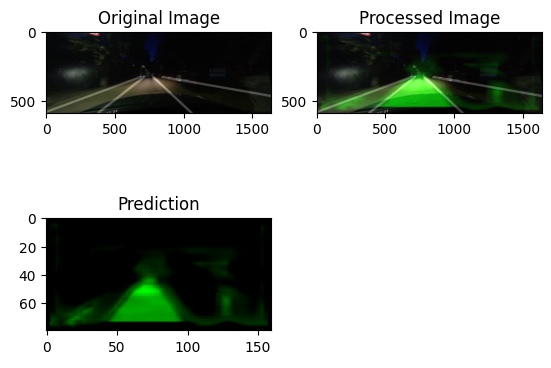

In [5]:
lanes = Lanes()

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
processed_image = lanes.road_lines(image)
# processed_image = cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(2, 2)
ax[0,0].imshow(image)
ax[0,0].set_title("Original Image")
ax[0,1].imshow(processed_image)
ax[0,1].set_title("Processed Image")
ax[1,0].imshow(lanes.lane_drawn)
ax[1,0].set_title("Prediction")
ax[1,1].axis("off")

# fig, ax = plt.subplots(1, 2)
# ax[0].imshow(image)
# ax[0].set_title("Original Image")
# ax[1].imshow(processed_image)
# ax[1].set_title("Processed Image")

plt.show()